In [8]:
import sys
sys.path.append('/home/dante/Documents/metnum tps again/mn-tp3/tp3/metnum3/lib/python3.8/site-packages')
import pandas as pd
import seaborn as sns

In [2]:
df_original = pd.read_csv("../dataset-folder/expectativa_de_vida.csv")
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

In [3]:
df_extra = pd.read_csv("../dataset-folder/extra.csv")
df_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IndicatorCode               10980 non-null  object 
 1   Indicator                   10980 non-null  object 
 2   ValueType                   10980 non-null  object 
 3   ParentLocationCode          10980 non-null  object 
 4   ParentLocation              10980 non-null  object 
 5   Location type               10980 non-null  object 
 6   SpatialDimValueCode         10980 non-null  object 
 7   Location                    10980 non-null  object 
 8   Period type                 10980 non-null  object 
 9   Period                      10980 non-null  int64  
 10  IsLatestYear                10980 non-null  bool   
 11  Dim1 type                   10980 non-null  object 
 12  Dim1                        10980 non-null  object 
 13  Dim1ValueCode               109

In [4]:
#Filtering date more than 2014 to do mean later
df_extra=df_extra[df_extra["Period"]>=2015]
#Nuestro estudio es para ambos generos asi que filtro lo repetido
df_extra=df_extra[df_extra["Dim1ValueCode"]=="BTSX"]
#Drop columnas que no sirven 
#df_extra.drop(columns=['IndicatorCode', 'Indicator','ValueType'])
df_extra=df_extra[["Location","FactValueNumeric"]]

In [ ]:
df_extra[df_extra["Location"]=="Venezuela (Bolivarian Republic of)"]

In [5]:
to_merge=df_extra.groupby(['Location']).mean().sort_values(by=['FactValueNumeric'])
to_merge

,FactValueNumeric
Location,
Japan,0.236
Singapore,0.328
Bahrain,0.350
Switzerland,0.546
Qatar,0.548
...,...
Lesotho,44.610
Jamaica,51.120
Venezuela (Bolivarian Republic of),61.860


In [6]:
df_final = pd.merge(df_original, to_merge, how='left', left_on='Country', right_on='Location')
df_final

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status,FactValueNumeric
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing,8.688
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing,3.674
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing,1.656
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing,9.600
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing,2.418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing,61.860
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing,1.812
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing,9.202
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing,6.656


In [ ]:
df_final[df_final["FactValueNumeric"].isnull()]

In [7]:
df_final.dropna().corr()

,Unnamed: 0,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,FactValueNumeric
Unnamed: 0,1.000000,-0.044250,0.086739,-0.027823,-0.104127,-0.107724,0.034179,-0.010325,0.000446,-0.023751,...,0.004714,0.006615,0.101967,-0.107185,-0.021302,0.000107,0.019861,-0.034239,0.012387,-0.061023
Life expectancy,-0.044250,1.000000,-0.874789,-0.169214,0.462004,0.543645,0.337005,-0.165377,0.756143,-0.196113,...,0.291127,0.647457,-0.616004,0.587033,-0.028453,-0.509217,-0.497180,0.821931,0.786895,-0.164934
Adult Mortality,0.086739,-0.874789,1.000000,0.056365,-0.279615,-0.417990,-0.192102,0.050475,-0.612927,0.076455,...,-0.168290,-0.424402,0.777741,-0.449345,-0.019577,0.390462,0.391990,-0.611682,-0.555145,0.256169
infant deaths,-0.027823,-0.169214,0.056365,1.000000,-0.108660,-0.117511,-0.298332,0.730231,-0.283348,0.996921,...,-0.199910,-0.216314,0.013720,-0.128115,0.905860,0.537009,0.539950,-0.152537,-0.199228,-0.042134
Alcohol,-0.104127,0.462004,-0.279615,-0.108660,1.000000,0.588687,0.164308,-0.055366,0.505811,-0.104228,...,0.357730,0.379991,-0.084826,0.632162,-0.038387,-0.478144,-0.462860,0.651959,0.672939,-0.087080
percentage expenditure,-0.107724,0.543645,-0.417990,-0.117511,0.588687,1.000000,0.014995,-0.120688,0.418721,-0.121153,...,0.334663,0.307405,-0.163293,0.980615,-0.042463,-0.373776,-0.373260,0.581653,0.572981,-0.199101
Hepatitis B,0.034179,0.337005,-0.192102,-0.298332,0.164308,0.014995,1.000000,-0.244931,0.248880,-0.312193,...,0.218962,0.750484,-0.169637,0.038660,-0.222347,-0.210528,-0.219512,0.282503,0.344267,-0.002404
Measles,-0.010325,-0.165377,0.050475,0.730231,-0.055366,-0.120688,-0.244931,1.000000,-0.290507,0.739110,...,-0.182515,-0.197539,0.037135,-0.126991,0.523558,0.325708,0.326488,-0.143890,-0.172806,-0.079252
BMI,0.000446,0.756143,-0.612927,-0.283348,0.505811,0.418721,0.248880,-0.290507,1.000000,-0.296579,...,0.420194,0.475604,-0.350495,0.472275,-0.144457,-0.746243,-0.749541,0.718123,0.755326,-0.052811
under-five deaths,-0.023751,-0.196113,0.076455,0.996921,-0.104228,-0.121153,-0.312193,0.739110,-0.296579,1.000000,...,-0.200438,-0.244113,0.028183,-0.133178,0.890776,0.538446,0.539743,-0.174053,-0.216322,-0.040360


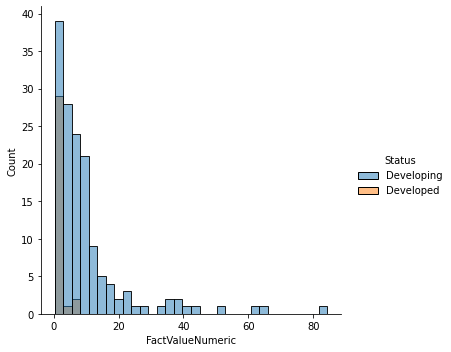

In [10]:
sns.displot(df_final,x="FactValueNumeric",hue="Status")

In [ ]:
df_final.to_csv('../dataset-folder/df_final.csv')